In [1]:
import copy

import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import skbio
import seaborn as sn

import americangut.notebook_environment as agenv
import americangut.util as agu

/Users/jwdebelius/anaconda/envs/americangut/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

In [6]:
beta_fp = agu.get_existing_path(agenv.paths['beta']['100nt']['1k']['ag-pgp-hmp-gg-wunifrac'])

agp_map_fp = agu.get_existing_path(agenv.paths['meta']['ag-cleaned-md'])
hmp_map_fp = agu.get_existing_path(agenv.paths['meta']['hmp-cleaned-md'])

In [7]:
all_dm = skbio.DistanceMatrix.read(beta_fp)

agp_map = pd.read_csv(agp_map_fp, sep='\t', dtype=str, na_values=['unknown', 'no_data'])
agp_map.set_index('#SampleID', inplace=True)

hmp_map = pd.read_csv(hmp_map_fp, sep='\t', dtype=str, na_values=['unknown', 'no_data'])
hmp_map.set_index('#SampleID', inplace=True)

In [5]:
agp_ids = set(agp_map.loc[agp_map.SIMPLE_BODY_SITE == 'FECAL'].index).intersection(set(all_dm.ids))
hmp_ids = set(hmp_map.loc[hmp_map.SIMPLE_BODY_SITE == 'FECAL'].index).intersection(set(all_dm.ids))

In [15]:
hmp_map.groupby('SIMPLE_BODY_SITE').count().max(1)

SIMPLE_BODY_SITE
FECAL     402
ORAL     3497
SKIN     2343
dtype: int64

In [16]:
agp = copy.copy(all_dm).filter(agp_ids)
hmp = copy.copy(all_dm).filter(hmp_ids)

In [50]:
iterations = 10

In [51]:
results = {}
for name, dm in zip(*(['AGP', 'HMP'], [agp, hmp])):
    samples = dm.ids
    mask = np.ones(dm.shape)
    
    num_possible = len(samples)
    print num_possible
    if num_possible < 500:
        depths = np.arange(5, num_possible, 10)
    else:
        depths = np.arange(5, num_possible, 50)
    min_dist = np.zeros((num_iter, len(depths)))

    for idx, iteration in enumerate(range(iterations)):
        for idy, depth in enumerate(depths):
            sub = np.random.choice(samples, depth, replace=False)
            dists = dm.filter(sub).condensed_form()
            min_dist[idx, idy] = np.min(dists)
    
    results[name] = min_dist

5667
388


Show full and embded sub figure at 1-1000 samples.
Create inset?

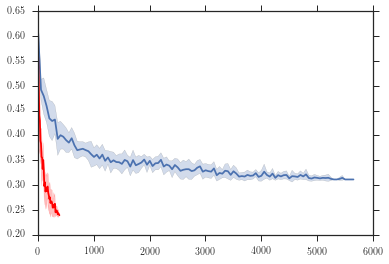

In [62]:
plt.fill_between(np.arange(5, 5667, 50), 
                 results['AGP'].mean(0) - results['AGP'].std(0),
                 results['AGP'].mean(0) + results['AGP'].std(0),
                 alpha=0.25,
                 )
plt.fill_between(np.arange(5, 388, 10),
                 results['HMP'].mean(0) - results['HMP'].std(0),
                 results['HMP'].mean(0) + results['HMP'].std(0),
                 alpha=0.25,
                 color = 'r',
                 )
plt.plot(np.arange(5, 5667, 50), 
          results['AGP'].mean(0))
plt.plot(np.arange(5, 388, 10),
         results['HMP'].mean(0),
         color='r',
         )
#                  'o'
#                  results['AGP'].mean(0) + results['AGP'].std(0),
#                  alpha=0.25,
#                  )
# plt.plot(depths, min_dist.mean(0))

randomly sample down to same number with oral and skin, to show convergence?

How does stuff look in different stratifications in American gut
replot with antibitoic usage.

...Add inset.

In [ ]:
results = {}
for name, dm in zip(*(['AGP', 'HMP'], [agp, hmp])):
    samples = dm.ids
    mask = np.ones(dm.shape)
    
    num_possible = len(samples)
    print num_possible
    if num_possible < 500:
        depths = np.arange(5, num_possible, 10)
    else:
        depths = np.arange(5, num_possible, 50)
    min_dist = np.zeros((num_iter, len(depths)))

    for idx, iteration in enumerate(range(iterations)):
        for idy, depth in enumerate(depths):
            sub = np.random.choice(samples, depth, replace=False)
            dists = dm.filter(sub).condensed_form()
            min_dist[idx, idy] = np.min(dists)
    
    results[name] = min_dist